# Trabalho Prático Final

- Disciplina: Aprendizado de Máquinas
- Aluno: Vítor Gabriel Reis Caitité
- Matrícula: 2021712430

## Objetivo:

O objetivo deste trabalho é praticar os conceitos aprendidos na disciplina Aprendizado de Máquinas e de adquirir experiência no uso de alguns dos principais métodos de classificação, na avaliação de modelos e na interpretação e apresentação de resultados de experimentos. Para isso, serão utilizados e comparados métodos de classificação baseados em  diferentes princı́pios em um problema de predição de vitórias do UFC.

Ultimate Fighting Championship (UFC) é uma organização de Artes Marciais Mistas (MMA) que produz eventos ao redor de todo o mundo. Desde 1993 até 2021 o UFC já organizou mais de 6000 lutas contabilizando o esporte masculino e feminino. 

Busca-se neste trabalho, através de um dataset onde cada amostra contém dados da luta e caracteríticas físicas de cada lutador, desenvolver classificadores capazes de classificar qual é o lutador vencedor. 

Alguns exemplo de aplicação de estudos assim são: 
  
  - Simular lutas.
  - Estudar o impacto de diferentes features no resultado final de lutas.

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn import svm
import xgboost
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline
import seaborn as sns
import tabulate
import pandas as pd
pd.set_option('display.max_columns', 200)

## Leitura e pré-processamento dos dados 

Como pode-se notar abaixo, inicialmente temos 2 data sets sem nenhum pré-processamento. O primeiro data set contém informações dos lutadores do UFC, como características físicas e dados históricos dos mesmos. Já o segundo contém informações e estatísticas de cada luta do UFC, como por exemplo estatisticas dos dois lutadores dentro da luta, tipo de decisão (decisão dos juízes, finalização, knockout, interrupção médica), quem foi o vencedor (variável alvo), etc.


In [2]:
df_fighter = pd.read_csv('data/raw_fighter_details.csv', sep=',')
df_fighter.head()

,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,Tom Aaron,NaN,155 lbs.,NaN,NaN,"Jul 13, 1978",0.00,0%,0.00,0%,0.00,0%,0%,0.0
1,Papy Abedi,"5' 11""",185 lbs.,NaN,Southpaw,"Jun 30, 1978",2.80,55%,3.15,48%,3.47,57%,50%,1.3
2,Shamil Abdurakhimov,"6' 3""",235 lbs.,"76""",Orthodox,"Sep 02, 1981",2.45,44%,2.45,58%,1.23,24%,47%,0.2
3,Danny Abbadi,"5' 11""",155 lbs.,NaN,Orthodox,"Jul 03, 1983",3.29,38%,4.41,57%,0.00,0%,77%,0.0
4,Hiroyuki Abe,"5' 6""",145 lbs.,NaN,Orthodox,NaN,1.71,36%,3.11,63%,0.00,0%,33%,0.0


In [3]:
df_fight = pd.read_csv('data/raw_total_fight_data.csv', sep=';')
df_fight.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_REV,B_REV,R_CTRL,B_CTRL,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
0,Adrian Yanez,Gustavo Lopez,2,0,41 of 103,23 of 51,39%,45%,41 of 103,23 of 51,0 of 0,0 of 1,---,0%,0,0,0,0,0:03,0:00,32 of 83,14 of 40,8 of 19,5 of 7,1 of 1,4 of 4,41 of 102,23 of 51,0 of 0,0 of 0,0 of 1,0 of 0,KO/TKO,3,0:27,3 Rnd (5-5-5),Chris Tognoni,"March 20, 2021","Las Vegas, Nevada, USA",Bantamweight Bout,Adrian Yanez
1,Trevin Giles,Roman Dolidze,0,0,27 of 57,32 of 67,47%,47%,43 of 73,75 of 110,1 of 2,1 of 3,50%,33%,1,2,0,1,1:15,4:15,22 of 51,10 of 37,4 of 4,7 of 14,1 of 2,15 of 16,15 of 42,28 of 59,4 of 5,3 of 6,8 of 10,1 of 2,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Herb Dean,"March 20, 2021","Las Vegas, Nevada, USA",Middleweight Bout,Trevin Giles
2,Tai Tuivasa,Harry Hunsucker,1,0,14 of 18,2 of 6,77%,33%,14 of 18,2 of 6,0 of 0,0 of 0,---,---,0,0,0,0,0:10,0:00,10 of 14,1 of 5,0 of 0,0 of 0,4 of 4,1 of 1,9 of 10,2 of 6,0 of 0,0 of 0,5 of 8,0 of 0,KO/TKO,1,0:49,3 Rnd (5-5-5),Herb Dean,"March 20, 2021","Las Vegas, Nevada, USA",Heavyweight Bout,Tai Tuivasa
3,Cheyanne Buys,Montserrat Conejo,0,0,31 of 65,15 of 41,47%,36%,49 of 87,136 of 168,0 of 0,4 of 5,---,80%,0,2,3,1,1:04,9:53,26 of 60,10 of 35,5 of 5,0 of 1,0 of 0,5 of 5,26 of 56,15 of 41,2 of 2,0 of 0,3 of 7,0 of 0,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Mark Smith,"March 20, 2021","Las Vegas, Nevada, USA",Women's Strawweight Bout,Montserrat Conejo
4,Marion Reneau,Macy Chiasson,0,0,30 of 63,51 of 138,47%,36%,59 of 93,92 of 184,2 of 4,1 of 1,50%,100%,0,0,0,1,2:15,3:48,14 of 40,29 of 110,7 of 13,15 of 20,9 of 10,7 of 8,25 of 54,36 of 119,5 of 9,13 of 15,0 of 0,2 of 4,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Mark Smith,"March 20, 2021","Las Vegas, Nevada, USA",Women's Bantamweight Bout,Macy Chiasson


### Merge dos 2 data sets

Abaixo foi realizado um *merge* dos dois data sets, com o objetivo de termos um data set único com dados dos lutadores e das lutas. Em cada luta foram adicionados os dados dos 2 lutadores participantes.

In [4]:
df = df_fight.merge(df_fighter, how='left', left_on='R_fighter', right_on='fighter_name')
df = df.merge(df_fighter, how='left', left_on='B_fighter', right_on='fighter_name',suffixes=('_Red', '_Blue'))
df.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_REV,B_REV,R_CTRL,B_CTRL,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner,fighter_name_Red,Height_Red,Weight_Red,Reach_Red,Stance_Red,DOB_Red,SLpM_Red,Str_Acc_Red,SApM_Red,Str_Def_Red,TD_Avg_Red,TD_Acc_Red,TD_Def_Red,Sub_Avg_Red,fighter_name_Blue,Height_Blue,Weight_Blue,Reach_Blue,Stance_Blue,DOB_Blue,SLpM_Blue,Str_Acc_Blue,SApM_Blue,Str_Def_Blue,TD_Avg_Blue,TD_Acc_Blue,TD_Def_Blue,Sub_Avg_Blue
0,Adrian Yanez,Gustavo Lopez,2,0,41 of 103,23 of 51,39%,45%,41 of 103,23 of 51,0 of 0,0 of 1,---,0%,0,0,0,0,0:03,0:00,32 of 83,14 of 40,8 of 19,5 of 7,1 of 1,4 of 4,41 of 102,23 of 51,0 of 0,0 of 0,0 of 1,0 of 0,KO/TKO,3,0:27,3 Rnd (5-5-5),Chris Tognoni,"March 20, 2021","Las Vegas, Nevada, USA",Bantamweight Bout,Adrian Yanez,Adrian Yanez,"5' 7""",135 lbs.,"70""",Orthodox,"Nov 29, 1993",4.69,44%,2.31,55%,0.00,0%,100%,0.0,Gustavo Lopez,"5' 5""",135 lbs.,"67""",Orthodox,"Jun 27, 1989",2.24,41%,4.65,51%,1.07,50%,27%,0.5
1,Trevin Giles,Roman Dolidze,0,0,27 of 57,32 of 67,47%,47%,43 of 73,75 of 110,1 of 2,1 of 3,50%,33%,1,2,0,1,1:15,4:15,22 of 51,10 of 37,4 of 4,7 of 14,1 of 2,15 of 16,15 of 42,28 of 59,4 of 5,3 of 6,8 of 10,1 of 2,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Herb Dean,"March 20, 2021","Las Vegas, Nevada, USA",Middleweight Bout,Trevin Giles,Trevin Giles,"6' 0""",185 lbs.,"74""",Orthodox,"Aug 06, 1992",3.26,56%,1.88,62%,1.37,80%,79%,0.3,Roman Dolidze,"6' 2""",205 lbs.,"76""",Orthodox,"Jul 15, 1988",2.98,51%,1.75,61%,1.75,50%,33%,2.2
2,Tai Tuivasa,Harry Hunsucker,1,0,14 of 18,2 of 6,77%,33%,14 of 18,2 of 6,0 of 0,0 of 0,---,---,0,0,0,0,0:10,0:00,10 of 14,1 of 5,0 of 0,0 of 0,4 of 4,1 of 1,9 of 10,2 of 6,0 of 0,0 of 0,5 of 8,0 of 0,KO/TKO,1,0:49,3 Rnd (5-5-5),Herb Dean,"March 20, 2021","Las Vegas, Nevada, USA",Heavyweight Bout,Tai Tuivasa,Tai Tuivasa,"6' 2""",264 lbs.,"75""",Southpaw,"Mar 16, 1993",4.38,50%,3.44,50%,0.00,0%,46%,0.0,Harry Hunsucker,"6' 2""",241 lbs.,"75""",Orthodox,"Jan 03, 1989",4.33,51%,8.44,41%,0.00,0%,0%,0.0
3,Cheyanne Buys,Montserrat Conejo,0,0,31 of 65,15 of 41,47%,36%,49 of 87,136 of 168,0 of 0,4 of 5,---,80%,0,2,3,1,1:04,9:53,26 of 60,10 of 35,5 of 5,0 of 1,0 of 0,5 of 5,26 of 56,15 of 41,2 of 2,0 of 0,3 of 7,0 of 0,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Mark Smith,"March 20, 2021","Las Vegas, Nevada, USA",Women's Strawweight Bout,Montserrat Conejo,Cheyanne Buys,"5' 3""",115 lbs.,"63""",Switch,"Jun 25, 1995",4.10,53%,1.67,65%,0.00,0%,60%,0.0,Montserrat Conejo,"5' 0""",115 lbs.,"61""",Southpaw,"Feb 03, 1993",1.00,36%,2.07,52%,4.00,80%,0%,2.0
4,Marion Reneau,Macy Chiasson,0,0,30 of 63,51 of 138,47%,36%,59 of 93,92 of 184,2 of 4,1 of 1,50%,100%,0,0,0,1,2:15,3:48,14 of 40,29 of 110,7 of 13,15 of 20,9 of 10,7 of 8,25 of 54,36 of 119,5 of 9,13 of 15,0 of 0,2 of 4,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Mark Smith,"March 20, 2021","Las Vegas, Nevada, USA",Women's Bantamweight Bout,Macy Chiasson,Marion Reneau,"5' 6""",135 lbs.,"68""",Orthodox,"Jun 20, 1977",3.29,41%,3.37,61%,0.66,63%,50%,0.8,Macy Chiasson,"5' 11""",135 lbs.,"72""",Orthodox,"Jul 27, 1991",4.16,49%,2.17,46%,0.98,21%,64%,0.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6012 entries, 0 to 6011
Data columns (total 69 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   R_fighter          6012 non-null   object 
 1   B_fighter          6012 non-null   object 
 2   R_KD               6012 non-null   int64  
 3   B_KD               6012 non-null   int64  
 4   R_SIG_STR.         6012 non-null   object 
 5   B_SIG_STR.         6012 non-null   object 
 6   R_SIG_STR_pct      6012 non-null   object 
 7   B_SIG_STR_pct      6012 non-null   object 
 8   R_TOTAL_STR.       6012 non-null   object 
 9   B_TOTAL_STR.       6012 non-null   object 
 10  R_TD               6012 non-null   object 
 11  B_TD               6012 non-null   object 
 12  R_TD_pct           6012 non-null   object 
 13  B_TD_pct           6012 non-null   object 
 14  R_SUB_ATT          6012 non-null   int64  
 15  B_SUB_ATT          6012 non-null   int64  
 16  R_REV              6012 

### Remoção de dados ausentes ou problemáticos

In [6]:
for col in df.columns:
    if df[col].isna().sum()>0:
        print(f'{col} : {df[col].isna().sum()}')

Referee : 32
Winner : 110
Height_Red : 4
Weight_Red : 2
Reach_Red : 406
Stance_Red : 29
DOB_Red : 63
Height_Blue : 10
Weight_Blue : 8
Reach_Blue : 891
Stance_Blue : 66
DOB_Blue : 172


In [7]:
df = df.drop(columns=['Referee', 'Reach_Red', 'Reach_Blue', 'DOB_Red', 'DOB_Blue', 'Stance_Blue', 'Stance_Red'])

In [8]:
df = df.dropna(subset=['Winner', 'Height_Blue', 'Height_Red', 'Weight_Blue', 'Weight_Red'])

In [9]:
if df.isna().sum().sum() == 0:
    print('Não possui mais amostras NaN.')

Não possui mais amostras NaN.


In [10]:
df.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_REV,B_REV,R_CTRL,B_CTRL,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,win_by,last_round,last_round_time,Format,date,location,Fight_type,Winner,fighter_name_Red,Height_Red,Weight_Red,SLpM_Red,Str_Acc_Red,SApM_Red,Str_Def_Red,TD_Avg_Red,TD_Acc_Red,TD_Def_Red,Sub_Avg_Red,fighter_name_Blue,Height_Blue,Weight_Blue,SLpM_Blue,Str_Acc_Blue,SApM_Blue,Str_Def_Blue,TD_Avg_Blue,TD_Acc_Blue,TD_Def_Blue,Sub_Avg_Blue
0,Adrian Yanez,Gustavo Lopez,2,0,41 of 103,23 of 51,39%,45%,41 of 103,23 of 51,0 of 0,0 of 1,---,0%,0,0,0,0,0:03,0:00,32 of 83,14 of 40,8 of 19,5 of 7,1 of 1,4 of 4,41 of 102,23 of 51,0 of 0,0 of 0,0 of 1,0 of 0,KO/TKO,3,0:27,3 Rnd (5-5-5),"March 20, 2021","Las Vegas, Nevada, USA",Bantamweight Bout,Adrian Yanez,Adrian Yanez,"5' 7""",135 lbs.,4.69,44%,2.31,55%,0.00,0%,100%,0.0,Gustavo Lopez,"5' 5""",135 lbs.,2.24,41%,4.65,51%,1.07,50%,27%,0.5
1,Trevin Giles,Roman Dolidze,0,0,27 of 57,32 of 67,47%,47%,43 of 73,75 of 110,1 of 2,1 of 3,50%,33%,1,2,0,1,1:15,4:15,22 of 51,10 of 37,4 of 4,7 of 14,1 of 2,15 of 16,15 of 42,28 of 59,4 of 5,3 of 6,8 of 10,1 of 2,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),"March 20, 2021","Las Vegas, Nevada, USA",Middleweight Bout,Trevin Giles,Trevin Giles,"6' 0""",185 lbs.,3.26,56%,1.88,62%,1.37,80%,79%,0.3,Roman Dolidze,"6' 2""",205 lbs.,2.98,51%,1.75,61%,1.75,50%,33%,2.2
2,Tai Tuivasa,Harry Hunsucker,1,0,14 of 18,2 of 6,77%,33%,14 of 18,2 of 6,0 of 0,0 of 0,---,---,0,0,0,0,0:10,0:00,10 of 14,1 of 5,0 of 0,0 of 0,4 of 4,1 of 1,9 of 10,2 of 6,0 of 0,0 of 0,5 of 8,0 of 0,KO/TKO,1,0:49,3 Rnd (5-5-5),"March 20, 2021","Las Vegas, Nevada, USA",Heavyweight Bout,Tai Tuivasa,Tai Tuivasa,"6' 2""",264 lbs.,4.38,50%,3.44,50%,0.00,0%,46%,0.0,Harry Hunsucker,"6' 2""",241 lbs.,4.33,51%,8.44,41%,0.00,0%,0%,0.0
3,Cheyanne Buys,Montserrat Conejo,0,0,31 of 65,15 of 41,47%,36%,49 of 87,136 of 168,0 of 0,4 of 5,---,80%,0,2,3,1,1:04,9:53,26 of 60,10 of 35,5 of 5,0 of 1,0 of 0,5 of 5,26 of 56,15 of 41,2 of 2,0 of 0,3 of 7,0 of 0,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),"March 20, 2021","Las Vegas, Nevada, USA",Women's Strawweight Bout,Montserrat Conejo,Cheyanne Buys,"5' 3""",115 lbs.,4.10,53%,1.67,65%,0.00,0%,60%,0.0,Montserrat Conejo,"5' 0""",115 lbs.,1.00,36%,2.07,52%,4.00,80%,0%,2.0
4,Marion Reneau,Macy Chiasson,0,0,30 of 63,51 of 138,47%,36%,59 of 93,92 of 184,2 of 4,1 of 1,50%,100%,0,0,0,1,2:15,3:48,14 of 40,29 of 110,7 of 13,15 of 20,9 of 10,7 of 8,25 of 54,36 of 119,5 of 9,13 of 15,0 of 0,2 of 4,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),"March 20, 2021","Las Vegas, Nevada, USA",Women's Bantamweight Bout,Macy Chiasson,Marion Reneau,"5' 6""",135 lbs.,3.29,41%,3.37,61%,0.66,63%,50%,0.8,Macy Chiasson,"5' 11""",135 lbs.,4.16,49%,2.17,46%,0.98,21%,64%,0.5


In [11]:
df = df.drop(columns=['last_round_time','date','location','fighter_name_Red','fighter_name_Blue', 'Format'])

## Feature Engeneering


Abaixo foram geradas novas features a partir das originais.

In [12]:
def winner(x, r_fighter, b_fighter):
    if r_fighter in x:
        return 1
    elif b_fighter in x:
        return 0

In [13]:
df['class'] = df[['Winner','R_fighter','B_fighter']].apply(lambda x: winner(x['Winner'], x['R_fighter'], x['B_fighter']), axis=1)
df = df.drop(columns=['R_fighter','B_fighter','Winner'])
df['class'].value_counts()

1    3968
0    1922
Name: class, dtype: int64

In [14]:
df['R_SIG_STRIKE_LANDED'] = df['R_SIG_STR.'].apply(lambda x: x.split()[0]).astype(int)
df['R_SIG_STRIKE_TOTAL'] = df['R_SIG_STR.'].apply(lambda x: x.split()[2]).astype(int)
df['B_SIG_STRIKE_LANDED'] = df['B_SIG_STR.'].apply(lambda x: x.split()[0]).astype(int)
df['B_SIG_STRIKE_TOTAL'] = df['B_SIG_STR.'].apply(lambda x: x.split()[2]).astype(int)
df['R_TOTAL_STRIKE_LANDED'] = df['R_TOTAL_STR.'].apply(lambda x: x.split()[0]).astype(int)
df['R_TOTAL_STRIKE_TOTAL'] = df['R_TOTAL_STR.'].apply(lambda x: x.split()[2]).astype(int)
df['B_TOTAL_STRIKE_LANDED'] = df['B_TOTAL_STR.'].apply(lambda x: x.split()[0]).astype(int)
df['B_TOTAL_STRIKE_TOTAL'] = df['B_TOTAL_STR.'].apply(lambda x: x.split()[2]).astype(int)
df['R_TD_STRIKE_LANDED'] = df['R_TD'].apply(lambda x: x.split()[0]).astype(int)
df['R_TD_STRIKE_TOTAL'] = df['R_TD'].apply(lambda x: x.split()[2]).astype(int)
df['B_TD_STRIKE_LANDED'] = df['B_TD'].apply(lambda x: x.split()[0]).astype(int)
df['B_TD_STRIKE_TOTAL'] = df['B_TD'].apply(lambda x: x.split()[2]).astype(int)
df['R_HEAD_LANDED'] = df['R_HEAD'].apply(lambda x: x.split()[0]).astype(int)
df['R_HEAD_TOTAL'] = df['R_HEAD'].apply(lambda x: x.split()[2]).astype(int)
df['B_HEAD_LANDED'] = df['B_HEAD'].apply(lambda x: x.split()[0]).astype(int)
df['B_HEAD_TOTAL'] = df['B_HEAD'].apply(lambda x: x.split()[2]).astype(int)
df['R_BODY_LANDED'] = df['R_BODY'].apply(lambda x: x.split()[0]).astype(int)
df['R_BODY_TOTAL'] = df['R_BODY'].apply(lambda x: x.split()[2]).astype(int)
df['B_BODY_LANDED'] = df['B_BODY'].apply(lambda x: x.split()[0]).astype(int)
df['B_BODY_TOTAL'] = df['B_BODY'].apply(lambda x: x.split()[2]).astype(int)
df['R_LEG_LANDED'] = df['R_LEG'].apply(lambda x: x.split()[0]).astype(int)
df['R_LEG_TOTAL'] = df['R_LEG'].apply(lambda x: x.split()[2]).astype(int)
df['B_LEG_LANDED'] = df['B_LEG'].apply(lambda x: x.split()[0]).astype(int)
df['B_LEG_TOTAL'] = df['B_LEG'].apply(lambda x: x.split()[2]).astype(int)
df['R_DISTANCE_LANDED'] = df['R_DISTANCE'].apply(lambda x: x.split()[0]).astype(int)
df['R_DISTANCE_TOTAL'] = df['R_DISTANCE'].apply(lambda x: x.split()[2]).astype(int)
df['B_DISTANCE_LANDED'] = df['B_DISTANCE'].apply(lambda x: x.split()[0]).astype(int)
df['B_DISTANCE_TOTAL'] = df['B_DISTANCE'].apply(lambda x: x.split()[2]).astype(int)
df['R_CLINCH_LANDED'] = df['R_CLINCH'].apply(lambda x: x.split()[0]).astype(int)
df['R_CLINCH_TOTAL'] = df['R_CLINCH'].apply(lambda x: x.split()[2]).astype(int)
df['B_CLINCH_LANDED'] = df['B_CLINCH'].apply(lambda x: x.split()[0]).astype(int)
df['B_CLINCH_TOTAL'] = df['B_CLINCH'].apply(lambda x: x.split()[2]).astype(int)
df['R_GROUND_LANDED'] = df['R_GROUND'].apply(lambda x: x.split()[0]).astype(int)
df['R_GROUND_TOTAL'] = df['R_GROUND'].apply(lambda x: x.split()[2]).astype(int)
df['B_GROUND_LANDED'] = df['B_GROUND'].apply(lambda x: x.split()[0]).astype(int)
df['B_GROUND_TOTAL'] = df['B_GROUND'].apply(lambda x: x.split()[2]).astype(int)
df = df.drop(columns=['R_SIG_STR.','B_SIG_STR.','R_TOTAL_STR.','B_TOTAL_STR.','R_TD','B_TD','R_HEAD','B_HEAD','R_BODY','B_BODY','R_LEG','B_LEG','R_DISTANCE','B_DISTANCE','R_CLINCH','B_CLINCH','R_GROUND','B_GROUND'])

In [15]:
df['R_SIG_STR_pct'] = df['R_SIG_STR_pct'].str.strip('%')
df['B_SIG_STR_pct'] = df['B_SIG_STR_pct'].str.strip('%')
df['R_TD_pct'] = df['R_TD_pct'].str.strip('%')
df['B_TD_pct'] = df['B_TD_pct'].str.strip('%')
df['Str_Acc_Red'] = df['Str_Acc_Red'].str.strip('%')
df['Str_Def_Red'] = df['Str_Def_Red'].str.strip('%')
df['TD_Acc_Red'] = df['TD_Acc_Red'].str.strip('%')
df['TD_Def_Red'] = df['TD_Def_Red'].str.strip('%')
df['Str_Acc_Blue'] = df['Str_Acc_Blue'].str.strip('%')
df['Str_Def_Blue'] = df['Str_Def_Blue'].str.strip('%')
df['TD_Acc_Blue'] = df['TD_Acc_Blue'].str.strip('%')
df['TD_Def_Blue'] = df['TD_Def_Blue'].str.strip('%')

In [16]:
from datetime import timedelta
def seconder(x):
    if x == '--':
        return 0
    else:
        mins, secs = map(float, x.split(':'))
        td = timedelta(minutes=mins, seconds=secs)
        return int(td.total_seconds())

In [17]:
df['R_CTRL'] = df['R_CTRL'].apply(seconder)
df['B_CTRL'] = df['B_CTRL'].apply(seconder)

In [18]:
def weight_class(x):
    if "Women's Strawweight" in x:
        return 'womens_strawweight'
    elif 'Flyweight' in x:
        if 'Women' in x:
            return 'womens_flyweight'
        else:
            return 'flyweight'
    elif 'Bantamweight' in x:
        if 'Women' in x:
            return 'womens_bantamweight'
        else:
            return 'bantamweight'
    elif 'Featherweight' in x:
        if 'Women' in x:
            return 'womens_featherweight'
        else:
            return 'featherweight'
    elif 'Lightweight' in x:
        return 'lightweight'
    elif 'Welterweight' in x:
        return 'welterweight'
    elif 'Middleweight' in x:
        return 'middleweight'
    elif 'Heavyweight' in x:
        if 'Light' in x:
            return 'light_heavyweight'
        else:
            return 'heavyweight'
    else:
        return 'other'

In [19]:
df['weightclass'] = df['Fight_type'].apply(lambda x: weight_class(x))
df['titlebout'] = df['Fight_type'].apply(lambda x: 1 if 'Title' in x else 0)
df = df.drop(columns=['Fight_type'])

In [20]:
df['Height_Red'] = df['Height_Red'].apply(lambda x: (int(x.split()[0].strip("/'"))*12) + (int(x.split()[1].strip('/""'))))
df['Height_Blue'] = df['Height_Blue'].apply(lambda x: (int(x.split()[0].strip("/'"))*12) + (int(x.split()[1].strip('/""'))))
df['Weight_Red'] = df['Weight_Red'].apply(lambda x: x.split()[0])
df['Weight_Blue'] = df['Weight_Blue'].apply(lambda x: x.split()[0])

In [21]:
df['R_TD_pct'] = df['R_TD_pct'].str.replace('---', '0').astype(int)
df['B_TD_pct'] = df['B_TD_pct'].str.replace('---', '0').astype(int)
df['R_SIG_STR_pct'] = df['R_SIG_STR_pct'].str.replace('---', '0').astype(int)
df['B_SIG_STR_pct'] = df['B_SIG_STR_pct'].str.replace('---', '0').astype(int)
df['Weight_Red'] = df['Weight_Red'].astype(int)
df['Weight_Blue'] = df['Weight_Blue'].astype(int)
df['Str_Acc_Red'] = df['Str_Acc_Red'].astype(int)
df['Str_Acc_Blue'] = df['Str_Acc_Blue'].astype(int)
df['Str_Def_Red'] = df['Str_Def_Red'].astype(int)
df['Str_Def_Blue'] = df['Str_Def_Blue'].astype(int)
df['TD_Acc_Red'] = df['TD_Acc_Red'].astype(int)
df['TD_Acc_Blue'] = df['TD_Acc_Blue'].astype(int)
df['TD_Def_Red'] = df['TD_Def_Red'].astype(int)
df['TD_Def_Blue'] = df['TD_Def_Blue'].astype(int)

### Codificação de dados categóricos em numéricos

Os dados categóricos foram codificados para numéricos através da codificação One-Hot.

In [22]:
ohe = OneHotEncoder(sparse=False)
X_ohe = ohe.fit_transform(df[['weightclass', 'win_by']])
df = df.drop(columns=['weightclass', 'win_by'])
ohe.get_feature_names()

array(['x0_bantamweight', 'x0_featherweight', 'x0_flyweight',
       'x0_heavyweight', 'x0_light_heavyweight', 'x0_lightweight',
       'x0_middleweight', 'x0_other', 'x0_welterweight',
       'x0_womens_bantamweight', 'x0_womens_featherweight',
       'x0_womens_flyweight', 'x0_womens_strawweight', 'x1_DQ',
       'x1_Decision - Majority', 'x1_Decision - Split',
       'x1_Decision - Unanimous', 'x1_KO/TKO', 'x1_Submission',
       "x1_TKO - Doctor's Stoppage"], dtype=object)

In [23]:
to_merge = pd.DataFrame(X_ohe, columns=ohe.get_feature_names())
df = df.reset_index().drop('index', axis=1)
df[ohe.get_feature_names()] = to_merge

### Dados prontos para aplicação de modelos

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5890 entries, 0 to 5889
Data columns (total 91 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   R_KD                        5890 non-null   int64  
 1   B_KD                        5890 non-null   int64  
 2   R_SIG_STR_pct               5890 non-null   int64  
 3   B_SIG_STR_pct               5890 non-null   int64  
 4   R_TD_pct                    5890 non-null   int64  
 5   B_TD_pct                    5890 non-null   int64  
 6   R_SUB_ATT                   5890 non-null   int64  
 7   B_SUB_ATT                   5890 non-null   int64  
 8   R_REV                       5890 non-null   int64  
 9   B_REV                       5890 non-null   int64  
 10  R_CTRL                      5890 non-null   int64  
 11  B_CTRL                      5890 non-null   int64  
 12  last_round                  5890 non-null   int64  
 13  Height_Red                  5890 

In [25]:
X = df.drop('class', axis='columns').to_numpy()
y = df["class"].to_numpy()
y = np.array(y.tolist())

## Desenvolvimento de rotinas para avaliação de cada modelo

As funções abaixo são respectivamente para as seguintes funcionalidades:
  - Plot da curva ROC
  - Plot da matriz de confusão 
  - Aplicação da validação cruzada (com 5 folds)

In [26]:
def plot_confusion_matrix(actual_classes : np.array, predicted_classes : np.array, sorted_labels : list):
    matrix = confusion_matrix(actual_classes, predicted_classes, labels=sorted_labels)
    plt.figure(figsize=(7,4))
    sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="BuPu", fmt="g")
    plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')
    plt.show()

In [27]:
def plot_roc_curve(tprs):
    plt.figure(figsize=(6,4))
    base_fpr = np.linspace(0, 1, 101)
    for tpr in tprs:
        plt.plot(base_fpr, tpr, 'b', alpha=0.15)
    # Mean and Std 
    mean_tprs = tprs.mean(axis=0)
    std = tprs.std(axis=0)
    tprs_upper = np.minimum(mean_tprs + std, 1)
    tprs_lower = mean_tprs - std

    # Plot mean ROC curve and also the variance around it to build confidence intervals
    plt.plot(base_fpr, mean_tprs, 'b')
    plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title("ROC Curve")
    plt.show()

In [28]:
def apply_cross_validation(model, X, y, params={}):
    k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    predicted_classes = []
    pred_proba = []
    real_classes = []
    accuracy = np.zeros(5)
    precision = np.zeros(5)
    recall = np.zeros(5)
    tprs = []
    base_fpr = np.linspace(0, 1, 101)
    idx = 0
    for train_indices, test_indices in k_fold.split(X, y):
        normalizer = MinMaxScaler()
        X_train = normalizer.fit_transform(X[train_indices])
        X_test = normalizer.transform(X[test_indices])
        y_train = y[train_indices]
        y_test = y[test_indices]

        clf = model(**params)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        predicted_classes = np.append(predicted_classes, y_pred)
        real_classes = np.append(real_classes, y_test)
        #calculating accuracy, precision and reall
        precision[idx] = precision_score(y_test, y_pred)
        recall[idx] = recall_score(y_test, y_pred)
        accuracy[idx] = accuracy_score(y_test, y_pred)
        y_score = clf.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
        tpr = np.interp(base_fpr, fpr, tpr)
        tpr[0] = 0.0
        tprs.append(tpr)
        pred_proba = np.append(pred_proba, y_score[:, 1])
        idx +=1
        print(f'Accuracy (fold {idx}): ' + '{:.4f}'.format(accuracy_score(y_test, y_pred)))  
    mean_accuracy = '{:.4f}'.format(accuracy.mean()) + "+/-" + '{:.4f}'.format(accuracy.std())
    mean_precision ='{:.4f}'.format(precision.mean()) + "+/-" + '{:.4f}'.format(precision.std())
    mean_recall = '{:.4f}'.format(recall.mean()) + "+/-" + '{:.4f}'.format(recall.std())
    print(f"\nMean Accuracy: " + mean_accuracy) 
    print(f"Mean Precision: " + mean_precision) 
    print(f"Mean Recall: " + mean_recall) 
    plot_confusion_matrix(real_classes, predicted_classes, [0, 1])
    plot_roc_curve(np.array(tprs))
    pr_curve = precision_recall_curve(real_classes, pred_proba)
    return clf, mean_accuracy, mean_precision, mean_recall, np.array(tprs), pr_curve

## Naive Bayes

A regra de decisão de Bayes estabelece que o vetor **x** seja atribuido à classe $C_i$ de maior probabilidade posterior $P(C_i|$**x**$)$. Sendo $P(C_i|$**x**$)$ = $\frac{P(\textbf{x}|C_i)P(C_i)}{P(\textbf{x})}$.

Para um problema de classificação binário a regra de classificação pode ser expressa da seguinte forma:

$Classe(x) = 
    \begin{cases}
      C_1 & \text{if $\frac{P(x|C_1)}{P(x|C_2)} \ > \ k$}\\
      C_2 & \text{otherwise}
    \end{cases}       $

onde $k=\frac{P(C_2)}{P(C_1)}$.

Generalizando, para problemas com 2 classes ou mais, basta atribuir a **x** a classe que resultar no maior valor da expressão $P(\textbf{x}|C_i)P(C_i)$.

O classificador Naive Bayes  assume que as features de **x** são independentes entre si. Em outras palavras um classificador Naive Bayes assume que a presença de uma característica particular em uma classe não está relacionada com a presença de qualquer outro recurso. 

Accuracy (fold 1): 0.8141
Accuracy (fold 2): 0.8056
Accuracy (fold 3): 0.8243
Accuracy (fold 4): 0.8141
Accuracy (fold 5): 0.8243

Mean Accuracy: 0.8165+/-0.0071
Mean Precision: 0.9112+/-0.0073
Mean Recall: 0.8062+/-0.0108


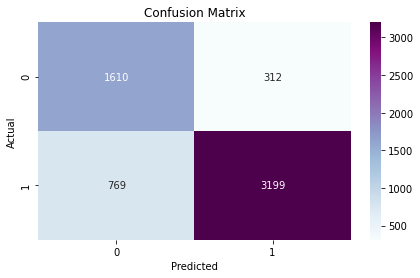

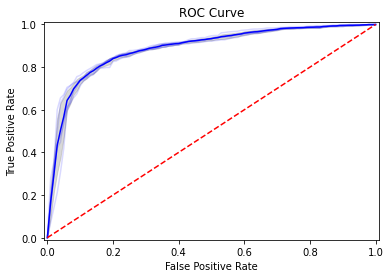

In [29]:
model = GaussianNB
clf, mean_accuracy_nb, mean_precision_nb, mean_recall_nb, roc_nb, pr_nb = apply_cross_validation(model, X, y)

Como pode ser visto acima as métricas utilizadas para avaliação do modelo foram:
  - $Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$
  - $Precision = \frac{TP}{TP + FP}$
  - $Recall = \frac{TP}{TP + FN}$
 
sendo:
  - True Positive (TP):  A classe positiva real é prevista como positiva.
  - True Negative (TN):  A classe negativa real é prevista negativa.
  - False Positive (FP): A classe real é negativa, mas prevista como positiva. 
  - False Negative (FN): A classe real é positiva, mas prevista como negativa.
  
Bacicamente, acurácia é simplesmente uma proporção das observações corretamente previstas para o total de observações. Precisão é a razão de observações positivas previstas corretamente para o total de observações positivas previstas. E Recall é a proporção de observações positivas corretamente previstas para todas as observações positivas. Em todas essas métricas, quanto mais próximo de 1 (ou 100%, considerando resultados percentuais), melhor o resultado.

Além disso, foram plotados a matriz de confusão e a curva ROC obtidas. A matriz de confusão é basicamente uma tabela que permite a visualização do desempenho de um algoritmo, tipicamente de aprendizado supervisionado. Cada linha da matriz representa as instâncias de uma classe real enquanto cada coluna representa as instâncias de uma classe prevista. Quanto maior os valores na diagonal principal e menor os outros valores, melhor será o desempenho do modelo (isso pode ser observado na matriz de confusão acima). Já a curva ROC é criada plotando a taxa de verdadeiros positivos (TPR) em relação à taxa de falsos positivos (FPR) em diferentes limiares de classificação. Uma maneira de se analisar a curva ROC é através da área abaixo da curva, quanto maior ela for, melhor é o resultado.

## Decision Tree

Uma árvore de decisão é um mapa dos possíveis resultados de uma série de escolhas relacionadas. Uma árvore de decisão normalmente começa com um único nó, que se ramifica em possíveis resultados. Cada um desses resultados leva a nós adicionais, que se ramificam em outras possibilidades.

Algoritmos para construção de árvores de decisão geralmente funcionam de cima para baixo, escolhendo uma variável em cada etapa que melhor divide o conjunto de itens. Existem diferentes métricas para avaliar a qualidade da divisão, duas muito comuns são o ganho de informação e o indíce de Gini (utilizado pelo algoritmo abaixo).

O primeiro teste será a realização de um *grid search* variando o comprimento máximo da árvore entre 1 e 10, e também com comprimento ilimitado. Variar esse parâmetro resulta em modelos com capacidades diferentes: árvores maiores têm mais complexidade do que árvores pequenas, o que é bom para reduzir o erro de treinamento. No entanto, pode levar o modelo a overfitting, o que não queremos, pois, piorará a generalização do modelo. Abaixo é possível observar o resultado obtido com a realização do *grid search*.

In [30]:
lst = list(range(2,11))
lst.append(None)
# Grid Search application
grid_params_DecisionTree = [{'DecisionTreeClassifier__max_depth': lst}]
pipe_tree = Pipeline([('scaler',  MinMaxScaler()),
            ('DecisionTreeClassifier', DecisionTreeClassifier())])
clf = GridSearchCV(pipe_tree, grid_params_DecisionTree , scoring='accuracy', refit=True, cv=5, verbose=1)
# Run fit with all sets of parameters.
clf.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('DecisionTreeClassifier',
                                        DecisionTreeClassifier())]),
             param_grid=[{'DecisionTreeClassifier__max_depth': [2, 3, 4, 5, 6,
                                                                7, 8, 9, 10,
                                                                None]}],
             scoring='accuracy', verbose=1)

In [31]:
max_depth = clf.best_params_['DecisionTreeClassifier__max_depth']
score = clf.best_score_
print("The best mean accuracy was " + '{:.4f}'.format(score) + " and was achieved for max_depth = " + str(max_depth) )

The best mean accuracy was 0.8424 and was achieved for max_depth = 6


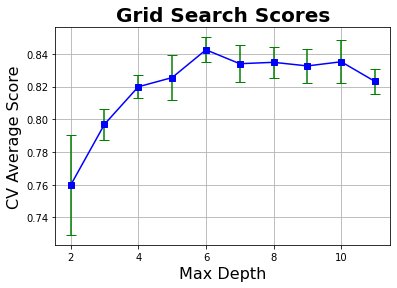

In [32]:
def plot_grid_search(cv_results, grid_param_1, name_param_1):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean)
    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd)

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)
    ax.errorbar(grid_param_1, scores_mean, scores_sd, color = 'blue', marker='s', capsize=5, ecolor = 'green')

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.grid('on')
    
# Calling Method 
lst = list(range(2,12))
plot_grid_search(clf.cv_results_, lst, 'Max Depth')

Abaixo está a aplicação da arvore de decisão com a melhor altura máxima definida acima. 
É notável pelos resultados abaixo que esse modelo obteve melhores resultados de acurácia e precisão do que o Naive Bayes, contudo esse último ganha no quesito precisão. Isso mostra que apesar de a árvore de decisão resultar em um classificador que acerta uma proporção maior de classificações, o Naive Bayes foi melhor em classificar amostras da classe negativa. Isso pode ser facilmente observado ao se olhar para as matrizes de confusão dos 2 modelos. 

Accuracy (fold 1): 0.8404
Accuracy (fold 2): 0.8285
Accuracy (fold 3): 0.8591
Accuracy (fold 4): 0.8463
Accuracy (fold 5): 0.8370

Mean Accuracy: 0.8423+/-0.0102
Mean Precision: 0.8837+/-0.0052
Mean Recall: 0.8821+/-0.0206


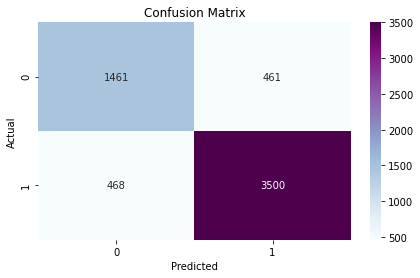

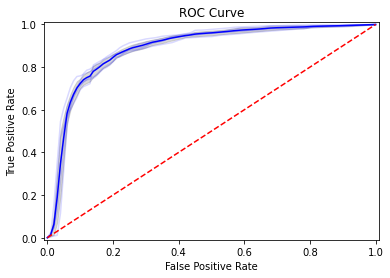

In [33]:
model = DecisionTreeClassifier
params = {'max_depth' : max_depth}
clf, mean_accuracy_dt, mean_precision_dt, mean_recall_dt, roc_dt, pr_dt = apply_cross_validation(model, X, y, params)

Abaixo está mostrada a árvore de decisão selecionada nos testes acima. Nessa figura é possível observar quais foram os critérios criados para divisão dos dados, o valor do índice Gini encontrado e também o altura da árvore selecionada pelo *grid search* acima.

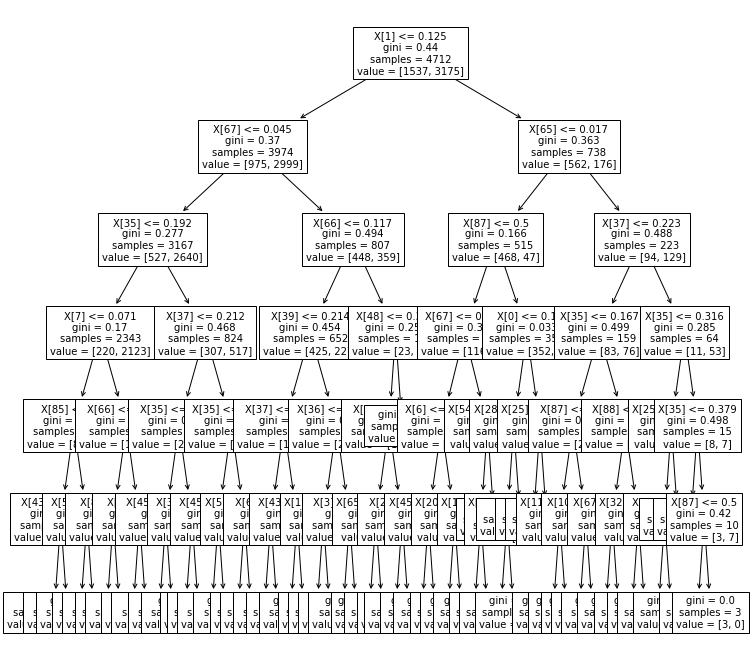

In [34]:
# plot tree
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=10)
plt.show()

## SVM

Máquina de Vetores Suporte (SVM) é um algoritmo formulado como um problema de otimização quadrática, que visa encontrar um hiperplano separador que maximiza sua distância até os dados de diferentes classes.

Uma importante técnica aplicada por modelos SVM é utilização do truque do kernel. A função Kernel nos permite operar no espaço original, sem precisar computar as coordenadas dos dados em um espaço dimensional superior. A intenção é mapear os pontos para um espaço de recurso dimensional mais alto de maneira que esses dados se tornem linearmente separáveis no espaço de recursos.

Abaixo foram utilizados diferentes modelos SVM com diferentes kernels: linear, sigmoid, polinomial e RBF. Cada kernel resulta em diferentes representações dos dados.

Para cada SVM abaixo, a seguinte metodologia de teste foi seguida:

  - 1. Aplicação de um grid search para encontrar os valores "ideais" dos parâmetros C e gamma.  O parâmetro C pode ser visto como uma penalização imposta ao modelo durante o treinamento para cada amostra erroneamente classificada. Assim, um alto valor de C resulta em classificador que busca a separação completa entre classes (podendo inclusive gerar overfitting ao resultar em fronteiras de separação muito complexas). Em contrapartida, baixos valores de C flexibilizam a etapa de treinamento e permitem fronteiras de decisão com alguns erros (também chamado de Soft Margin). Isso pode ajudar na generalização do modelo mas também pode levar à underfitting. Nesta etapa serão testados 20 valores de C entre 0 e 100. Já o parâmetro gamma ($\gamma$) se trata de um coeficiente para os kernels RBF, polinomial e sigmóide. Nesta etapa serão testados $\gamma = \frac{1}{n_{features}}$ ('auto') e $\gamma = \frac{1}{(n_{features} \cdot var(X))}$ ('scale'). 
 
  - 2. Teste da SVM com os melhores parâmetros definidos em 1. Aqui, para cada SVM, serão avaliadas as métricas acurácia, precisão e *recall*. Além disso, serão plotadas a matriz de confusão e curva ROC.
  

### SVM Kernel Linear

Fitting 5 folds for each of 20 candidates, totalling 100 fits
The best mean accuracy was 0.8873 and was achieved for C = 8.858667904100823


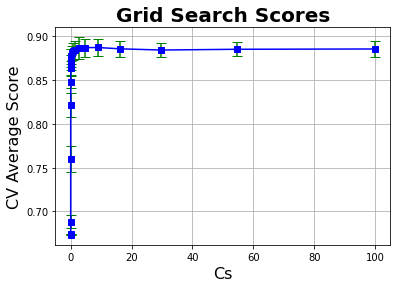

In [35]:
lst = np.logspace(-3, 2, 20)
# Grid Search application
grid_params_svm = [{'SVM__C': lst}]
pipe_svm = Pipeline([('scaler',  MinMaxScaler()),
            ('SVM', svm.SVC(kernel="linear"))])
clf = GridSearchCV(pipe_svm, grid_params_svm , scoring='accuracy', refit=True, cv=5, verbose=1)
# Run fit with all sets of parameters.
clf.fit(X, y)
#Results of Grid Seach:
C  = clf.best_params_['SVM__C']
score = clf.best_score_
print("The best mean accuracy was " + '{:.4f}'.format(score) + " and was achieved for C = " + str(C) )
plot_grid_search(clf.cv_results_, lst, 'Cs')

Accuracy (fold 1): 0.8896
Accuracy (fold 2): 0.8930
Accuracy (fold 3): 0.9007
Accuracy (fold 4): 0.9083
Accuracy (fold 5): 0.8837

Mean Accuracy: 0.8951+/-0.0086
Mean Precision: 0.9154+/-0.0056
Mean Recall: 0.9302+/-0.0108


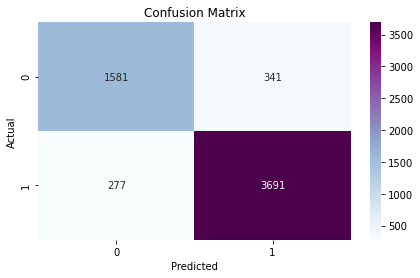

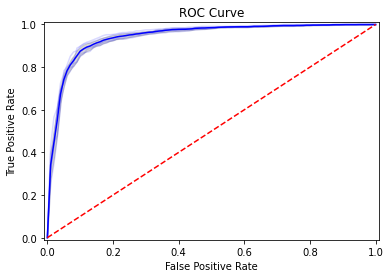

In [36]:
model = svm.SVC
params = {'kernel' : "linear", 'C' : C, 'probability' : True}
clf, mean_accuracy_linear_svm, mean_precision_linear_svm, mean_recall_linear_svm, roc_linear_svm, pr_lsvm = apply_cross_validation(model, X, y, params)

### SVM Kernel Sigmoid

In [73]:
def plot_grid_search_2_params(searcher, grid_param_1, grid_param_2, name_param_1, name_param_2):
    scores_mean = searcher.cv_results_['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_1), len(grid_param_2), order='F').T
    scores_sd = searcher.cv_results_['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_1), len(grid_param_2), order='F').T
    print('Best params = {}'.format(searcher.best_params_))
    print('Best score = {}'.format(scores_mean.max()))
    _, ax = plt.subplots(1,1)
    
    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.errorbar(grid_param_1, scores_mean[idx, :], scores_sd[idx, :], marker='s', capsize=5, label=name_param_2 + ': ' + str(val))
    
    ax.tick_params(axis='x')
    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.grid('on')
    ax.legend(loc='best')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
The best mean accuracy was 0.8837 and was achieved for C = 100.0and gamma = auto
Best params = {'SVM__C': 100.0, 'SVM__gamma': 'auto'}
Best score = 0.8837011884550083


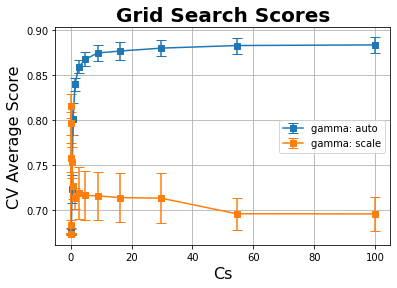

In [38]:
lst = np.logspace(-3, 2, 20)
# Grid Search application
grid_params_svm = [{'SVM__C': lst,
                   'SVM__gamma' : ['auto', 'scale']}]
pipe_svm = Pipeline([('scaler',  MinMaxScaler()),
            ('SVM', svm.SVC(kernel="sigmoid"))])
clf = GridSearchCV(pipe_svm, grid_params_svm , scoring='accuracy', refit=True, cv=5, verbose=1)
# Run fit with all sets of parameters.
clf.fit(X, y)
# Results of Grid Search
C  = clf.best_params_['SVM__C']
gamma = clf.best_params_['SVM__gamma']
score = clf.best_score_
print("The best mean accuracy was " + '{:.4f}'.format(score) + " and was achieved for C = " + str(C) + "and gamma = " + str(gamma) )
plot_grid_search_2_params(clf, lst, ['auto', 'scale'], 'Cs', 'gamma')

No gráfico acima fica claro a importância dos parâmetros C e principalmente gamma. Um valor de gamma ruim não permitiu uma acurácia maior que 75% para a maioria dos valores de C testados. Enquanto que o valor de gamma melhor permitiu acurácias maiores de 85% para diversos valores de C entre 3 e 100.

Accuracy (fold 1): 0.8879
Accuracy (fold 2): 0.8871
Accuracy (fold 3): 0.9041
Accuracy (fold 4): 0.8998
Accuracy (fold 5): 0.8862

Mean Accuracy: 0.8930+/-0.0074
Mean Precision: 0.9089+/-0.0048
Mean Recall: 0.9350+/-0.0107


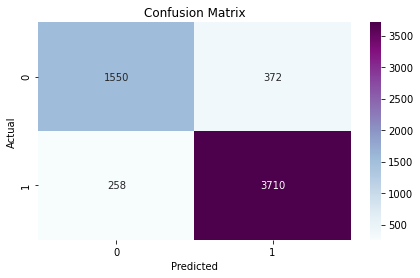

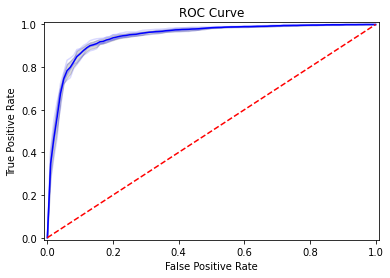

In [39]:
model = svm.SVC
params = {'kernel' : "sigmoid", 'gamma' : gamma, 'C' : C, 'probability' : True}
clf, mean_accuracy_sigmoid_svm, mean_precision_sigmoid_svm, mean_recall_sigmoid_svm, roc_sigmoid_svm, pr_ssvm= apply_cross_validation(model, X, y, params)

### SVM Kernel Polinomial

Fitting 5 folds for each of 40 candidates, totalling 200 fits
The best mean accuracy was 0.9019 and was achieved for C = 1.438449888287663and gamma = scale
Best params = {'SVM__C': 1.438449888287663, 'SVM__gamma': 'scale'}
Best score = 0.901867572156197


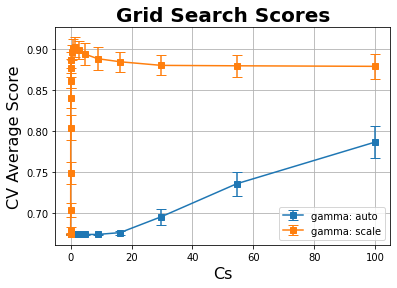

In [40]:
# The degree of the sigmoid kernel tested here was 3.
lst = np.logspace(-3, 2, 20)
# Grid Search application
grid_params_svm = [{'SVM__C': lst,
                   'SVM__gamma' : ['auto', 'scale']}]
pipe_svm = Pipeline([('scaler',  MinMaxScaler()),
            ('SVM', svm.SVC(kernel="poly", gamma='scale'))])
clf = GridSearchCV(pipe_svm, grid_params_svm , scoring='accuracy', refit=True, cv=5, verbose=1)
# Run fit with all sets of parameters.
clf.fit(X, y)
# Results of Grid Search
C  = clf.best_params_['SVM__C']
gamma = clf.best_params_['SVM__gamma']
score = clf.best_score_
print("The best mean accuracy was " + '{:.4f}'.format(score) + " and was achieved for C = " + str(C) + "and gamma = " + str(gamma) )
plot_grid_search_2_params(clf, lst, ['auto', 'scale'], 'Cs', 'gamma')

Accuracy (fold 1): 0.9075
Accuracy (fold 2): 0.9117
Accuracy (fold 3): 0.9160
Accuracy (fold 4): 0.8990
Accuracy (fold 5): 0.8990

Mean Accuracy: 0.9066+/-0.0068
Mean Precision: 0.9216+/-0.0040
Mean Recall: 0.9415+/-0.0080


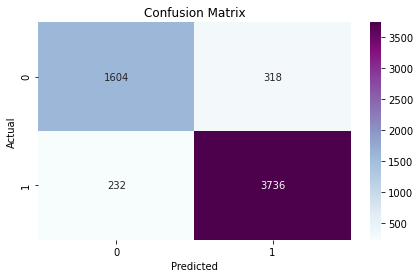

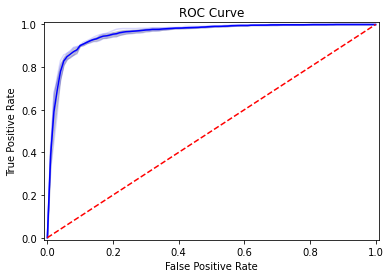

In [41]:
model = svm.SVC
params = {'kernel' : "poly", 'gamma' : gamma, 'C' : C, 'probability' : True}
clf, mean_accuracy_poly_svm, mean_precision_poly_svm, mean_recall_poly_svm, roc_poly_svm, pr_psvm = apply_cross_validation(model, X, y, params)

### SVM Kernel RBF

Fitting 5 folds for each of 40 candidates, totalling 200 fits
The best mean accuracy was 0.9029 and was achieved for C = 2.636650898730358and gamma = scale
Best params = {'SVM__C': 2.636650898730358, 'SVM__gamma': 'scale'}
Best score = 0.9028862478777588


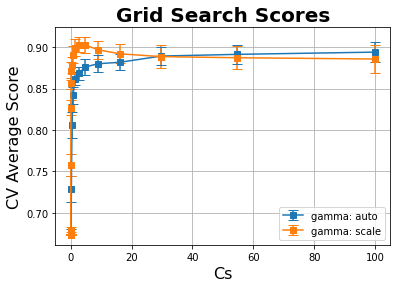

In [42]:
lst = np.logspace(-3, 2, 20)
# Grid Search application
grid_params_svm = [{'SVM__C': lst,
                   'SVM__gamma' : ['auto', 'scale']}]
pipe_svm = Pipeline([('scaler',  MinMaxScaler()),
            ('SVM', svm.SVC(kernel="rbf", gamma='scale'))])
clf = GridSearchCV(pipe_svm, grid_params_svm , scoring='accuracy', refit=True, cv=5, verbose=1)
# Run fit with all sets of parameters.
clf.fit(X, y)
# Results of Grid Search
C  = clf.best_params_['SVM__C']
gamma = clf.best_params_['SVM__gamma']
score = clf.best_score_
print("The best mean accuracy was " + '{:.4f}'.format(score) + " and was achieved for C = " + str(C) + "and gamma = " + str(gamma) )
plot_grid_search_2_params(clf, lst, ['auto', 'scale'], 'Cs', 'gamma')

Accuracy (fold 1): 0.9126
Accuracy (fold 2): 0.9100
Accuracy (fold 3): 0.9185
Accuracy (fold 4): 0.9041
Accuracy (fold 5): 0.9041

Mean Accuracy: 0.9098+/-0.0055
Mean Precision: 0.9215+/-0.0026
Mean Recall: 0.9468+/-0.0065


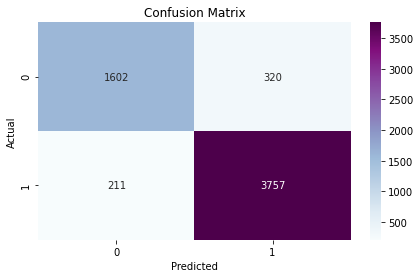

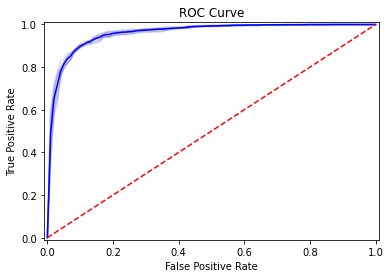

In [43]:
model = svm.SVC
params = {'kernel' : "rbf", 'gamma' : gamma, 'C': C, 'probability' : True}
clf, mean_accuracy_rbf_svm, mean_precision_rbf_svm, mean_recall_rbf_svm, roc_rbf_svm, pr_rsvm = apply_cross_validation(model, X, y, params)

### Comparação entre os modelos SVM

Na tabela abaixo é possível observar uma performance similar entre as SVMs de diferentes kernels. Note que o modelo com kernel RBF atingiu melhores valores médios para acurácia e precisão. Além disso, considerando o desvio padrão como uma margem de erro o modelo possui um desempenho similar a SVM com kernel polinomial. 

In [44]:
data = [["SVM Kernel", 'Accuracy', 'Precision', 'Recall'],
        ["Linear", mean_accuracy_linear_svm, mean_precision_linear_svm, mean_recall_linear_svm],
        ["Sigmoid", mean_accuracy_sigmoid_svm, mean_precision_sigmoid_svm, mean_recall_sigmoid_svm],
        ["Poly", mean_accuracy_poly_svm, mean_precision_poly_svm, mean_recall_poly_svm],
        ["RBF", mean_accuracy_rbf_svm, mean_precision_rbf_svm, mean_recall_rbf_svm]]
table = tabulate.tabulate(data, tablefmt='grid')
print(table)

+------------+-----------------+-----------------+-----------------+
| SVM Kernel | Accuracy        | Precision       | Recall          |
+------------+-----------------+-----------------+-----------------+
| Linear     | 0.8951+/-0.0086 | 0.9154+/-0.0056 | 0.9302+/-0.0108 |
+------------+-----------------+-----------------+-----------------+
| Sigmoid    | 0.8930+/-0.0074 | 0.9089+/-0.0048 | 0.9350+/-0.0107 |
+------------+-----------------+-----------------+-----------------+
| Poly       | 0.9066+/-0.0068 | 0.9216+/-0.0040 | 0.9415+/-0.0080 |
+------------+-----------------+-----------------+-----------------+
| RBF        | 0.9098+/-0.0055 | 0.9215+/-0.0026 | 0.9468+/-0.0065 |
+------------+-----------------+-----------------+-----------------+


## k-NN

O algoritmo de k-vizinhos mais próximos (k-NN) é um algoritmo de aprendizado de máquina supervisionado simples de implementar que pode ser usado para resolver problemas de classificação e regressão. O algoritmo k-NN assume que coisas semelhantes existem nas proximidades. Em outras palavras, coisas semelhantes estão próximas umas das outras. A lógica de classificação do k-NN é muito simples, ele observa a classe dos vizinhos mais próximos (dos dados de treinamento), e realiza uma votação onde a classe da maioria determina a classe do novo ponto.

Resumidamente, o classificador recebe um dado novo (não classificado) e mede sua distância em relação a cada um dos dos dados de treinamento. Então, seleciona-se as k menores distâncias e verifica-se as classes desses k dados. Contabiliza-se a quantidade de vezes que cada classe que apareceu e atribui ao novo dado a classe da maioria.

Para um k é pequeno, a classificação fica mais sensível a regiões bastante próximas (o que pode gerar *overfitting*). Já um k grande demais pode gerar *underfitting*. Assim, é necessário achar um k "ideal", que seja grande o suficiente para deixar a classificação mais robusta (menos sujeita a ruídos) e pequeno o suficiente para não ocorrer *underfitting*. Nesse sentido foram testados abaixo 51 valores para k entre 1 e 101. O valor que resultou na maior acurácia média foi o valor escolhido para realização de mais análises.

Fitting 5 folds for each of 51 candidates, totalling 255 fits
The best mean accuracy was 0.8066 and was achieved for K = 15


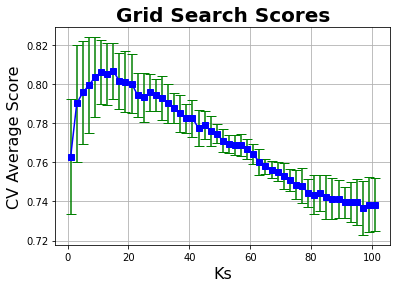

In [45]:
lst =  list(np.linspace(1, 101, 51, dtype=int))
# Grid Search application
grid_params_knn = [{'knn__n_neighbors': lst}]
pipe_knn = Pipeline([('scaler',  MinMaxScaler()),
            ('knn', KNeighborsClassifier())])
clf = GridSearchCV(pipe_knn, grid_params_knn , scoring='accuracy', refit=True, cv=5, verbose=1)
# Run fit with all sets of parameters.
clf.fit(X, y)
# Results of Grid Search
k  = clf.best_params_['knn__n_neighbors']
score = clf.best_score_
print("The best mean accuracy was " + '{:.4f}'.format(score) + " and was achieved for K = " + str(k) )
plot_grid_search(clf.cv_results_, lst, 'Ks')

Accuracy (fold 1): 0.8234
Accuracy (fold 2): 0.8200
Accuracy (fold 3): 0.8192
Accuracy (fold 4): 0.8005
Accuracy (fold 5): 0.8149

Mean Accuracy: 0.8156+/-0.0080
Mean Precision: 0.8297+/-0.0045
Mean Recall: 0.9138+/-0.0098


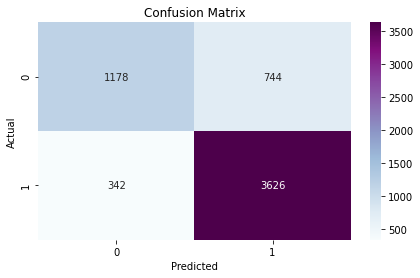

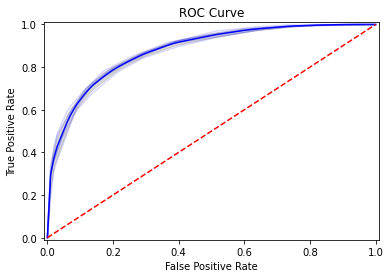

In [46]:
model = KNeighborsClassifier
params = {'n_neighbors' : k}
clf, mean_accuracy_knn, mean_precision_knn, mean_recall_knn, roc_knn, pr_knn = apply_cross_validation(model, X, y, params)

Dos modelos testados até então o k-NN foi o que resultou em um pior desempenho. O k-NN resultou em menores valores de acurácia, precisão e *recall* se comparado aos modelos anteriores. Esse desempenho pior pode também ser observado na matriz de confusão (que mostra uma quantidade significativa de **falsos positivos**). Além disso, é notável que a curva ROC do k-NN mostra um resultado pior se comparada com as curvas ROC dos outros modelos (essa comparação será mostrada no final deste *script*). 

## Random Forest

O Random Forest consiste em um grande número de árvores de decisão individuais que operam como um conjunto. Cada árvore individual no Random Forest gera uma previsão de classe e a classe com mais votos se torna a previsão do modelo. 

A ideia geral desse modelo é que um grande número de árvores relativamente não correlacionados operando como um comitê superará qualquer um dos modelos constituintes individuais.

Dois parâmetros importantes desse modelo são o tamanho de cada árvore e a quantidade de árvores. Para o primeiro parâmetro foi selecionado a mesma altura da árvore definida no teste do modelo "Decision Tree". Já o número de árvores foi selecionado por um *grid search*, como mostrado abaixo. 


Fitting 5 folds for each of 40 candidates, totalling 200 fits
The best mean accuracy was 0.8862 and was achieved for n_estimators = 80 and for max_depth = 12
Best params = {'RandomForest__max_depth': 12, 'RandomForest__n_estimators': 80}
Best score = 0.8862478777589133


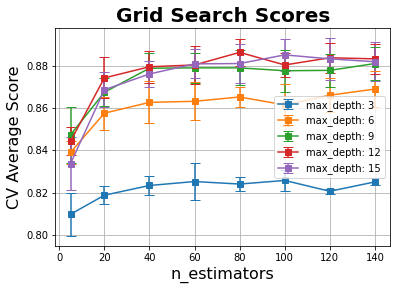

In [74]:
lst =  [5, 20, 40, 60, 80, 100, 120, 140]
# Grid Search application
# The max depth will be the value encountered in Decision Tree test
grid_params_random_forest = [{'RandomForest__n_estimators': lst,
                              'RandomForest__max_depth': [3, 6, 9, 12, 15]}]
pipe_random_forest = Pipeline([('scaler',  MinMaxScaler()),
            ('RandomForest', RandomForestClassifier())])
clf = GridSearchCV(pipe_random_forest, grid_params_random_forest , scoring='accuracy', refit=True, cv=5, verbose=1)
# Run fit with all sets of parameters.
clf.fit(X, y)
# Results of Grid Search
n_estimators  = clf.best_params_['RandomForest__n_estimators']
max_depth  = clf.best_params_['RandomForest__max_depth']
score = clf.best_score_
print("The best mean accuracy was " + '{:.4f}'.format(score) + " and was achieved for n_estimators = "
      + str(n_estimators) + " and for max_depth = " + str(max_depth) )
plot_grid_search_2_params(clf, lst, [3, 6, 9, 12, 15], 'n_estimators', 'max_depth')

Accuracy (fold 1): 0.8837
Accuracy (fold 2): 0.8896
Accuracy (fold 3): 0.8888
Accuracy (fold 4): 0.8854
Accuracy (fold 5): 0.8871

Mean Accuracy: 0.8869+/-0.0022
Mean Precision: 0.8915+/-0.0043
Mean Recall: 0.9476+/-0.0051


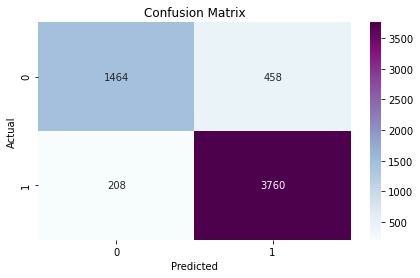

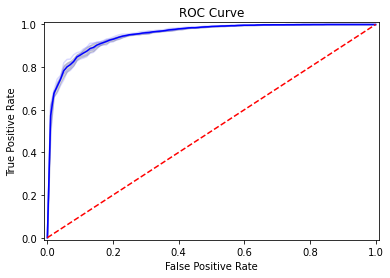

In [75]:
model = RandomForestClassifier
params = {'n_estimators' : n_estimators, "max_depth" : max_depth}
clf, mean_accuracy_rf, mean_precision_rf, mean_recall_rf, roc_rf, pr_rf = apply_cross_validation(model, X, y, params)

Dos modelos testados até aqui o *Random Forest* foi o que resultou no melhor resultado de acurácia. Além disso, esse modelo também resultou (até o momento) na melhor matriz de confusão (com maiores valores na diagonal principal) e na melhor curva ROC (com maior area sob a curva). 

## Gradient Tree Boosting

O *Gradient Boosting* é um algoritmo de aprendizado de máquina que utiliza uma combinação de resultados de preditores fracos, com o objetivo de produzir um melhor modelo preditivo. No caso do *Gradient Tree Boosting* é realizada uma combinação de árvores de decisão. Esse algoritmo constrói o modelo em etapas e os generaliza, permitindo a otimização de uma função de perda diferenciável arbitrária. 

A ideia desse algoritmo é gerar uma corrente de árvores de decisão, onde cada uma tem como objetivo minimizar o erro do modelo anterior, por meio da função de perda. Cada árvore é multiplicada um valor (*learning rate*). Esse valor, tem como objetivo determinar o impacto de cada árvore no modelo final. Quanto menor o valor, menor a contribuição de cada árvore.

Nos testes abaixo, o *learning rate* foi mantido em 0.1 e o número de estimadores foi selecionado através de um *grid search*. O tamanho de cada árvore foi mesmo escolhido para o *Random Forest*.

Fitting 5 folds for each of 40 candidates, totalling 200 fits
The best mean accuracy was 0.9036 and was achieved for n_estimators = 120 and for max_depth = 6
Best params = {'GradientBoosting__max_depth': 6, 'GradientBoosting__n_estimators': 120}
Best score = 0.9035653650254669


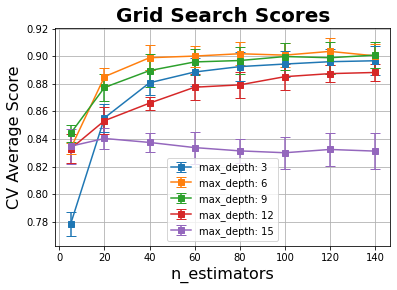

In [85]:
lst =  [5, 20, 40, 60, 80, 100, 120, 140]
# Grid Search application
# The max depth will be the value encountered in Decision Tree test
grid_params_gradient_boosting = [{'GradientBoosting__n_estimators': lst,
                                  'GradientBoosting__max_depth': [3, 6, 9, 12, 15]}]
pipe_gradient_boosting = Pipeline([('scaler',  MinMaxScaler()),
            ('GradientBoosting', GradientBoostingClassifier())])
clf = GridSearchCV(pipe_gradient_boosting, grid_params_gradient_boosting, scoring='accuracy', refit=True, cv=5, verbose=1)
# Run fit with all sets of parameters.
clf.fit(X, y)
# Results of Grid Search
n_estimators  = clf.best_params_['GradientBoosting__n_estimators']
max_depth  = clf.best_params_['GradientBoosting__max_depth']
score = clf.best_score_
print("The best mean accuracy was " + '{:.4f}'.format(score) + " and was achieved for n_estimators = "
      + str(n_estimators) + " and for max_depth = " + str(max_depth) )
plot_grid_search_2_params(clf, lst, [3, 6, 9, 12, 15], 'n_estimators', 'max_depth')

Accuracy (fold 1): 0.9126
Accuracy (fold 2): 0.9134
Accuracy (fold 3): 0.9126
Accuracy (fold 4): 0.9058
Accuracy (fold 5): 0.9083

Mean Accuracy: 0.9105+/-0.0030
Mean Precision: 0.9239+/-0.0046
Mean Recall: 0.9451+/-0.0076


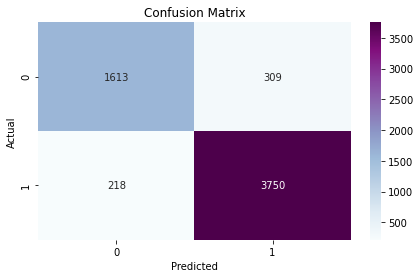

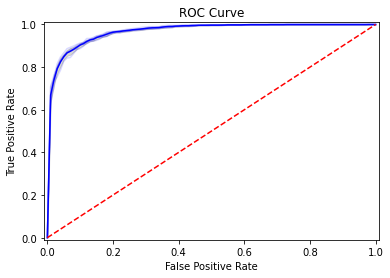

In [86]:
model = GradientBoostingClassifier
params = {'n_estimators' : n_estimators, "max_depth" : max_depth}
clf, mean_accuracy_gb, mean_precision_gb, mean_recall_gb, roc_gb, pr_gb = apply_cross_validation(model, X, y, params)

Em todos os requisitos testados (acurácia, precisão e *recall*) esse modelo resultou em uma melhor performance. Além disso, esse modelo também resultou na melhor matriz de confusão (com maiores valores na diagonal principal) e na melhor curva ROC (com maior area sob a curva). 

## XGBoost

Fitting 5 folds for each of 40 candidates, totalling 200 fits
The best mean accuracy was 0.9039 and was achieved for n_estimators = 80 and for max_depth = 9
Best params = {'XGBClassifier__max_depth': 9, 'XGBClassifier__n_estimators': 80}
Best score = 0.903904923599321


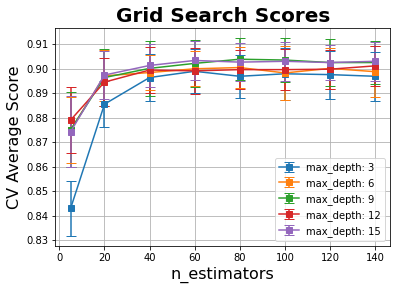

In [87]:
lst =  [5, 20, 40, 60, 80, 100, 120, 140]
# Grid Search application
# The max depth will be the value encountered in Decision Tree test
grid_params_xgb = [{'XGBClassifier__n_estimators': lst,
                    'XGBClassifier__max_depth': [3, 6, 9, 12, 15]}]
pipe_xgb = Pipeline([('scaler',  MinMaxScaler()),
            ('XGBClassifier', XGBClassifier(objective='binary:logistic', eval_metric='error', use_label_encoder=False))])
clf = GridSearchCV(pipe_xgb, grid_params_xgb, scoring='accuracy', refit=True, cv=5, verbose=1)
# Run fit with all sets of parameters.
clf.fit(X, y)
# Results of Grid Search
n_estimators  = clf.best_params_['XGBClassifier__n_estimators']
max_depth  = clf.best_params_['XGBClassifier__max_depth']
score = clf.best_score_
print("The best mean accuracy was " + '{:.4f}'.format(score) + " and was achieved for n_estimators = "
      + str(n_estimators) + " and for max_depth = " + str(max_depth) )
plot_grid_search_2_params(clf, lst, [3, 6, 9, 12, 15], 'n_estimators', 'max_depth')

Accuracy (fold 1): 0.9058
Accuracy (fold 2): 0.9134
Accuracy (fold 3): 0.9143
Accuracy (fold 4): 0.9032
Accuracy (fold 5): 0.9075

Mean Accuracy: 0.9088+/-0.0043
Mean Precision: 0.9230+/-0.0076
Mean Recall: 0.9435+/-0.0104


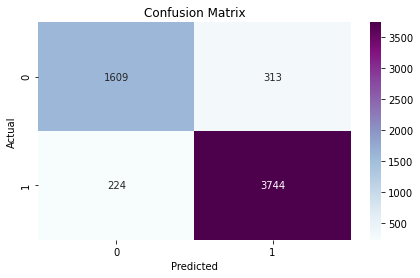

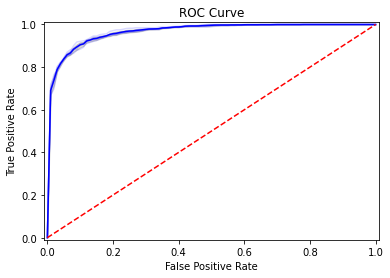

In [88]:
model = XGBClassifier
params = {'n_estimators' : n_estimators, "max_depth" : max_depth, 'objective' : 'binary:logistic', 'eval_metric' : 'error', 'use_label_encoder' : False}
clf, mean_accuracy_xgb, mean_precision_xgb, mean_recall_xgb, roc_xgb, pr_xgb = apply_cross_validation(model, X, y, params)

## Multi-layer Perceptron

Fitting 5 folds for each of 5 candidates, totalling 25 fits
The best mean accuracy was 0.9005 and was achieved for hidden_layer_sizes = (65,)


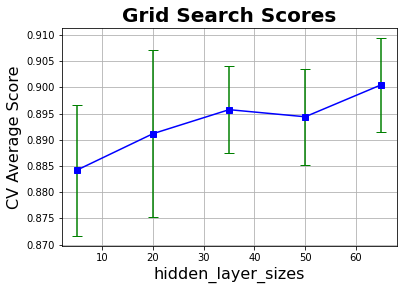

In [89]:
lst =  [(5,), (20,), (35,), (50,), (65,)]
# Grid Search application
grid_params_mlp = [{'MLPClassifier__hidden_layer_sizes': lst}]
pipe_mlp = Pipeline([('scaler',  MinMaxScaler()),
            ('MLPClassifier', MLPClassifier(max_iter=1000, early_stopping=True, n_iter_no_change=50))])
clf = GridSearchCV(pipe_mlp, grid_params_mlp , scoring='accuracy', refit=True, cv=5, verbose=1)
# Run fit with all sets of parameters.
clf.fit(X, y)
# Results of Grid Search
hidden_layer_sizes = clf.best_params_['MLPClassifier__hidden_layer_sizes']
score = clf.best_score_
print("The best mean accuracy was " + '{:.4f}'.format(score) + " and was achieved for hidden_layer_sizes = " + str(hidden_layer_sizes))
plot_grid_search(clf.cv_results_, lst, 'hidden_layer_sizes')

Accuracy (fold 1): 0.9143
Accuracy (fold 2): 0.9066
Accuracy (fold 3): 0.9126
Accuracy (fold 4): 0.9126
Accuracy (fold 5): 0.8888

Mean Accuracy: 0.9070+/-0.0094
Mean Precision: 0.9268+/-0.0111
Mean Recall: 0.9360+/-0.0106


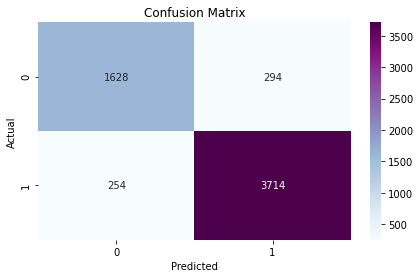

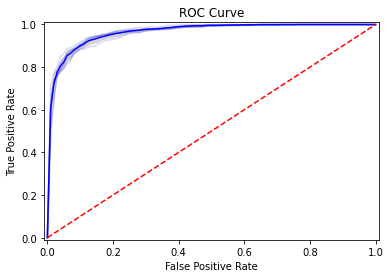

In [90]:
model = MLPClassifier
params = {'hidden_layer_sizes':hidden_layer_sizes, 'max_iter':1000, 'early_stopping':True, 'n_iter_no_change':50}
clf, mean_accuracy_mlp, mean_precision_mlp, mean_recall_mlp, roc_mlp, pr_mlp = apply_cross_validation(model, X, y, params)

## Comparação Entre os Métodos

### Accuracy, Precision and Recall

Na tabela abaixo percebe-se que o **Gradient Tree Boosting** obteve maior acurácia média e maior precisão média. Além disso, esse modelo obteve também um bom resultado de *recall*, estatisticamente igual ao *recall* obtido pelo **Random Forest** (que obteve a melhor média nesse quesito). Em contrapartida, o **k-NN** e o Naive Bayes foram os modelos que atingiram o piores desempenhos. Isso era esperado visto a simplicidade deste 2 modelos.

In [91]:
data = [["Método", 'Accuracy', 'Precision', 'Recall'],
        ["Naive Bayes", mean_accuracy_nb, mean_precision_nb, mean_recall_nb],
        ["Decision Tree", mean_accuracy_dt, mean_precision_dt, mean_recall_dt],
        ["SVM (Linear)", mean_accuracy_linear_svm, mean_precision_linear_svm, mean_recall_linear_svm],
        ["SVM (Sigmoid)", mean_accuracy_sigmoid_svm, mean_precision_sigmoid_svm, mean_recall_sigmoid_svm],
        ["SVM (Poly)", mean_accuracy_poly_svm, mean_precision_poly_svm, mean_recall_poly_svm],
        ["SVM (RBF)", mean_accuracy_rbf_svm, mean_precision_rbf_svm, mean_recall_rbf_svm],
        ["k-NN", mean_accuracy_knn, mean_precision_knn, mean_recall_knn],
        ["Random Forest", mean_accuracy_rf, mean_precision_rf, mean_recall_rf],
        ["Gradient Tree Boosting", mean_accuracy_gb, mean_precision_gb, mean_recall_gb],
        ["XGBoost", mean_accuracy_xgb, mean_precision_xgb, mean_recall_xgb],
        ["MLP", mean_accuracy_mlp, mean_precision_mlp, mean_recall_mlp]]
table = tabulate.tabulate(data, tablefmt='grid')
print(table)

+------------------------+-----------------+-----------------+-----------------+
| Método                 | Accuracy        | Precision       | Recall          |
+------------------------+-----------------+-----------------+-----------------+
| Naive Bayes            | 0.8165+/-0.0071 | 0.9112+/-0.0073 | 0.8062+/-0.0108 |
+------------------------+-----------------+-----------------+-----------------+
| Decision Tree          | 0.8423+/-0.0102 | 0.8837+/-0.0052 | 0.8821+/-0.0206 |
+------------------------+-----------------+-----------------+-----------------+
| SVM (Linear)           | 0.8951+/-0.0086 | 0.9154+/-0.0056 | 0.9302+/-0.0108 |
+------------------------+-----------------+-----------------+-----------------+
| SVM (Sigmoid)          | 0.8930+/-0.0074 | 0.9089+/-0.0048 | 0.9350+/-0.0107 |
+------------------------+-----------------+-----------------+-----------------+
| SVM (Poly)             | 0.9066+/-0.0068 | 0.9216+/-0.0040 | 0.9415+/-0.0080 |
+------------------------+--

### ROC Curve

No gráfico abaixo nota-se que os melhores desempenhos (considerando a curva ROC) foram obtidos pelo **Gradient Tree Boosting**, **MLP**, **XGBoost**, **SVM** e **Random Forest**. Em contrapartida, modelos como **k-NN**, **Decision Tree** e **Naive Bayes**  obtiveram piores desempenhos.

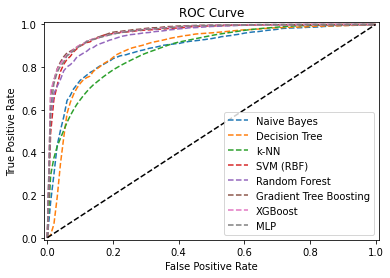

In [92]:
plt.figure(figsize=(6,4))
base_fpr = np.linspace(0, 1, 101)
# Plot mean ROC curve for all methods in the same graph
plt.plot(base_fpr, roc_nb.mean(axis=0), linestyle='--', label='Naive Bayes')
plt.plot(base_fpr, roc_dt.mean(axis=0), linestyle='--', label='Decision Tree')
plt.plot(base_fpr, roc_knn.mean(axis=0), linestyle='--', label='k-NN')
#plt.plot(base_fpr, roc_linear_svm.mean(axis=0), linestyle='--', label='SVM (Linear)')
#plt.plot(base_fpr, roc_sigmoid_svm.mean(axis=0), linestyle='--', label='SVM (Sigmoid)')
plt.plot(base_fpr, roc_rbf_svm.mean(axis=0), linestyle='--', label='SVM (RBF)')
#plt.plot(base_fpr, roc_poly_svm.mean(axis=0), linestyle='--', label='SVM (Poly)')
plt.plot(base_fpr, roc_rf.mean(axis=0), linestyle='--', label='Random Forest')
plt.plot(base_fpr, roc_gb.mean(axis=0), linestyle='--', label='Gradient Tree Boosting')
plt.plot(base_fpr, roc_xgb.mean(axis=0), linestyle='--', label='XGBoost')
plt.plot(base_fpr, roc_mlp.mean(axis=0), linestyle='--', label='MLP')
plt.plot([0, 1], [0, 1],'--k')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Curve")
plt.legend()
plt.show()

### Precision-Recall Curve

De maneira semelhante foi também gerado um gráfico contendo as curvas *Precision-Recall* para todos os modelos. Novamente, os melhores desempenhos (considerando as curvas abaixo) foram obtidos pelo**Gradient Tree Boosting**, **MLP**, **XGBoost**, **SVM** e **Random Forest**. Em contrapartida, **k-NN**, **Decision Tree** e **Naive Bayes**  foram os modelo que atingiram o pior desempenho (menores áreas sob a curva).

A curva de precisão-recall mostra o trade-off entre precisão e *recall* para diferentes limiares. Uma área alta sob a curva representa alt *recall*  e alta precisão, onde alta precisão está relacionada a uma baixa taxa de falsos positivos e alta revocação (*recall*) está ligada a uma baixa taxa de falsos negativos.

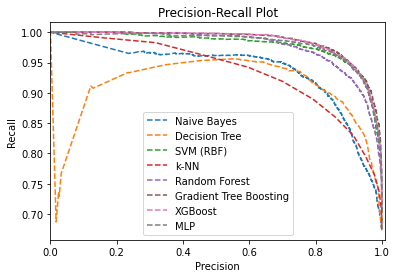

In [93]:
# Plot Precision-Recall curve for all methods in the same graph
plt.plot(pr_nb[1], pr_nb[0], linestyle='--', label='Naive Bayes')
plt.plot(pr_dt[1], pr_dt[0], linestyle='--', label='Decision Tree')
#plt.plot(pr_lsvm[1], pr_lsvm[0], linestyle='--', label='SVM (Linear)')
#plt.plot(pr_ssvm[1], pr_ssvm[0], linestyle='--', label='SVM (Sigmoid)')
plt.plot(pr_rsvm[1], pr_rsvm[0], linestyle='--', label='SVM (RBF)')
#plt.plot(pr_psvm[1], pr_psvm[0], linestyle='--', label='SVM (Poly)')
plt.plot(pr_knn[1], pr_knn[0], linestyle='--', label='k-NN')
plt.plot(pr_rf[1], pr_rf[0], linestyle='--', label='Random Forest')
plt.plot(pr_gb[1], pr_gb[0], linestyle='--', label='Gradient Tree Boosting')
plt.plot(pr_xgb[1], pr_xgb[0], linestyle='--', label='XGBoost')
plt.plot(pr_mlp[1], pr_mlp[0], linestyle='--', label='MLP')
plt.title('Precision-Recall Plot')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.xlim([0, 1.01])
plt.legend() 
plt.show()